# Using 5 variables to produce a model to predict the diagnosis of heart disease using classification (closer to 0 or 1)

#### DSCI 100 Group 36 : Kaitlin Khu, Andrea Marie Cabrera, Jennifer Yujin Choi, Jaskaran Singh


## Introduction:

### Background information:

Heart disease is a generalization of multiple separate conditions that include blood vessel diseases, arrhythmias, congenital heart defects, heart valve disease, heart infection, and problems with the heart muscle. Often caused by buildup of plaques in the arteries that results in thinner blood vessels, due to poor decision of lifestyle, such as smoking, health conditions such as high blood pressure, high cholesterol and diabetes, and a diet high in salt and saturated fats. In addition, heart disease can result in deadly complications such as heart failure and attacks, strokes, sudden cardiac arrest and more. (American Heart Association, 2017)

### Research question:
Through this project, we aim to produce a model to predict the diagnosis of heart disease using several classification techniques and algorithms in machine learning and language R. Specifically, this project aims to determine if the attributes, age, trestbps, chol, thalach, oldpeak, and num, are sufficient to produce an accurate model for predicting the risk of heart disease.

### Dataset information:
We will be using multivariate data sets from the Heart Disease Data Set published by the University of California Irvine’s Machine Learning Repository. Looking specifically at data from Cleveland, Hungary and Switzerland, using 5 attributes to generate a predictive model. (Chellammal & Sharmila, 2019)

Attribute|Value|Description
:-----:|:-----:|:----- 
age|25-75|Individual’s age in years 
trestbps|90-170mm/Hg|Individuals’ resting blood pressure
chol|<250mg/dL|Cholesterol levels
thalach|100-190 bpm|Individual’s maximum heart rate reached
oldpeak|0-3 in decimals|ST depression induced by exercise relative to rest 
num|0 or 1|Angiographic Disease Status (< 50% diameter narrowing or > 50% diameter narrowing)

## Preliminary exploratory data analysis:

In [1]:
#loading libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

### **[✔]** data can be loaded from R

In [2]:
cleveland_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
         col_names=c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))%>%
add_column(ID="cleveland")

hungarian_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data",
         col_names=c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))%>%
add_column(ID="hungarian")

va_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",
         col_names=c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))%>%
add_column(ID="va")

total_data<-rbind(cleveland_data,hungarian_data,va_data)

head(total_data)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_character(),
  chol = col_character(),
  fbs = col_character(),
  restecg = col_character(),
  thalach = col_character(),
  exang = col_character(),
  oldpeak = col_double(),
  slope = col_character(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_character(),
  chol = col_character(),
  fbs = col_character(),
  restecg = col_double(),
  thalach = c

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,ID
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,cleveland
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,cleveland
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,cleveland
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,cleveland


### **[✔]** data has been cleaned and wrangled into a tidy format

In [3]:
total_filtered_data <- total_data %>%
#                     select(age,trestbps,thalach,oldpeak,num,ID)%>%#selected the categories decided on (exp below)
                    select(age,trestbps,thalach,chol,oldpeak,num,ID)%>% #selected the categories decided on (exp below)
                    filter(num==0|num==1) %>% #removed any num value that didnt make sense
                    mutate(trestbps = as.double(trestbps)) %>% #the following mutate isnt necessary (can remove)
                    mutate(thalach = as.double(thalach)) %>%
                    mutate(oldpeak = as.double(oldpeak)) %>%
                    mutate(chol = as.double(chol)) %>%
                    mutate(num = as.factor(num)) %>% 
                    filter(chol!=0) %>%  #some chol values are 0 instead of NA
                    filter(thalach!=0) %>%
                    filter(oldpeak>0 & oldpeak<=3)

cleveland_filtered_data <- cleveland_data %>%
#                     select(age,trestbps,thalach,oldpeak,num,ID)%>%#selected the categories decided on (exp below)
                    select(age,trestbps,thalach,chol,oldpeak,num,ID)%>%#selected the categories decided on (exp below)
                    filter(num==0|num==1) %>% #removed any num value that didnt make sense
                    mutate(trestbps = as.double(trestbps)) %>% #the following mutate isnt necessary (can remove)
                    mutate(thalach = as.double(thalach)) %>%
                    mutate(oldpeak = as.double(oldpeak)) %>%
                    mutate(chol = as.double(chol)) %>%
                    mutate(num = as.factor(num)) %>% 
                    filter(chol!=0) %>%  #some chol values are 0 instead of NA
                    filter(thalach!=0) %>%
                    filter(oldpeak>0 & oldpeak<=3)

va_filtered_data <- va_data %>%
#                     select(age,trestbps,thalach,oldpeak,num,ID)%>%#selected the categories decided on (exp below)
                    select(age,trestbps,thalach,chol,oldpeak,num,ID)%>%#selected the categories decided on (exp below)
                    filter(num==0|num==1) %>% #removed any num value that didnt make sense
                    mutate(trestbps = as.double(trestbps)) %>% #the following mutate isnt necessary (can remove)
                    mutate(thalach = as.double(thalach)) %>%
                    mutate(oldpeak = as.double(oldpeak)) %>%
                    mutate(chol = as.double(chol)) %>%
                    mutate(num = as.factor(num)) %>% 
                    filter(chol!=0) %>%  #some chol values are 0 instead of NA
                    filter(thalach!=0) %>%
                    filter(oldpeak>0 & oldpeak<=3)

hung_filtered_data <- hungarian_data %>%
#                     select(age,trestbps,thalach,oldpeak,num,ID)%>%#selected the categories decided on (exp below)
                    select(age,trestbps,thalach,chol,oldpeak,num,ID)%>%#selected the categories decided on (exp below)
                    filter(num==0|num==1) %>% #removed any num value that didnt make sense
                    mutate(trestbps = as.double(trestbps)) %>% #the following mutate isnt necessary (can remove)
                    mutate(thalach = as.double(thalach)) %>%
                    mutate(oldpeak = as.double(oldpeak)) %>%
                    mutate(chol = as.double(chol)) %>%
                    mutate(num = as.factor(num)) %>% 
                    filter(chol!=0) %>%  #some chol values are 0 instead of NA
                    filter(thalach!=0) %>%
                    filter(oldpeak>0 & oldpeak<=3)

head(total_filtered_data)
va_filtered_data

Warning message:
“Problem with `mutate()` input `trestbps`.
ℹ NAs introduced by coercion
ℹ Input `trestbps` is `as.double(trestbps)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `thalach`.
ℹ NAs introduced by coercion
ℹ Input `thalach` is `as.double(thalach)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `oldpeak`.
ℹ NAs introduced by coercion
ℹ Input `oldpeak` is `as.double(oldpeak)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `chol`.
ℹ NAs introduced by coercion
ℹ Input `chol` is `as.double(chol)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `trestbps`.
ℹ NAs introduced by coercion
ℹ Input `trestbps` is `as.double(trestbps)`.”
Warning message in 

age,trestbps,thalach,chol,oldpeak,num,ID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
63,145,150,233,2.3,0,cleveland
67,120,129,229,2.6,1,cleveland
41,130,172,204,1.4,0,cleveland
56,120,178,236,0.8,0,cleveland
57,120,163,354,0.6,0,cleveland
57,140,148,192,0.4,0,cleveland


age,trestbps,thalach,chol,oldpeak,num,ID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
55,142,149,228,2.5,1,va
66,110,99,213,1.3,0,va
60,160,157,267,0.5,1,va
46,110,125,236,2.0,1,va
60,130,140,186,0.5,1,va
56,120,120,100,1.5,1,va
59,122,117,233,1.3,1,va
56,124,161,224,2.0,0,va
57,130,148,311,2.0,1,va


### **[✔]** data was split into training and testing data (displayed table: training data)

In [4]:
set.seed(1234)

cleveland_split<-initial_split(cleveland_filtered_data,prop=0.75,strata=num)  #splitting cleveland's data 
cleveland_training<-training(cleveland_split)
cleveland_testing<-testing(cleveland_split)

hungarian_split<-initial_split(hung_filtered_data,prop=0.75,strata=num) #splitting hungarian's data
hungarian_training<-training(hungarian_split)
hungarian_testing<-testing(hungarian_split)

va_split<-initial_split(va_filtered_data,prop=0.75,strata=num)  #splitting va's data
va_training<-training(va_split)
va_testing<-testing(va_split)

head(cleveland_training)
head(hungarian_training)
head(va_training)

heart_disease_training<-rbind(cleveland_training,hungarian_training,va_training) #binding training data together 
heart_disease_testing<-rbind(cleveland_testing,hungarian_testing,va_testing) #binding testing data together

age,trestbps,thalach,chol,oldpeak,num,ID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
63,145,150,233,2.3,0,cleveland
67,120,129,229,2.6,1,cleveland
41,130,172,204,1.4,0,cleveland
56,120,178,236,0.8,0,cleveland
56,140,153,294,1.3,0,cleveland
52,172,162,199,0.5,0,cleveland


age,trestbps,thalach,chol,oldpeak,num,ID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
36,112,184,340,1.0,0,hungarian
39,120,160,200,1.0,0,hungarian
42,120,152,228,1.5,0,hungarian
44,120,142,184,1.0,0,hungarian
46,110,140,238,1.0,0,hungarian
48,108,175,163,2.0,0,hungarian


age,trestbps,thalach,chol,oldpeak,num,ID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
55,142,149,228,2.5,1,va
66,110,99,213,1.3,0,va
60,160,157,267,0.5,1,va
60,130,140,186,0.5,1,va
56,120,120,100,1.5,1,va
56,124,161,224,2.0,0,va


### **[✔]** training data was used for exploratory data analysis

**data was not scaled
when data is scaled it shows NA instead of the graphs for the ggpairs**

#### graph for exploratory data analysis

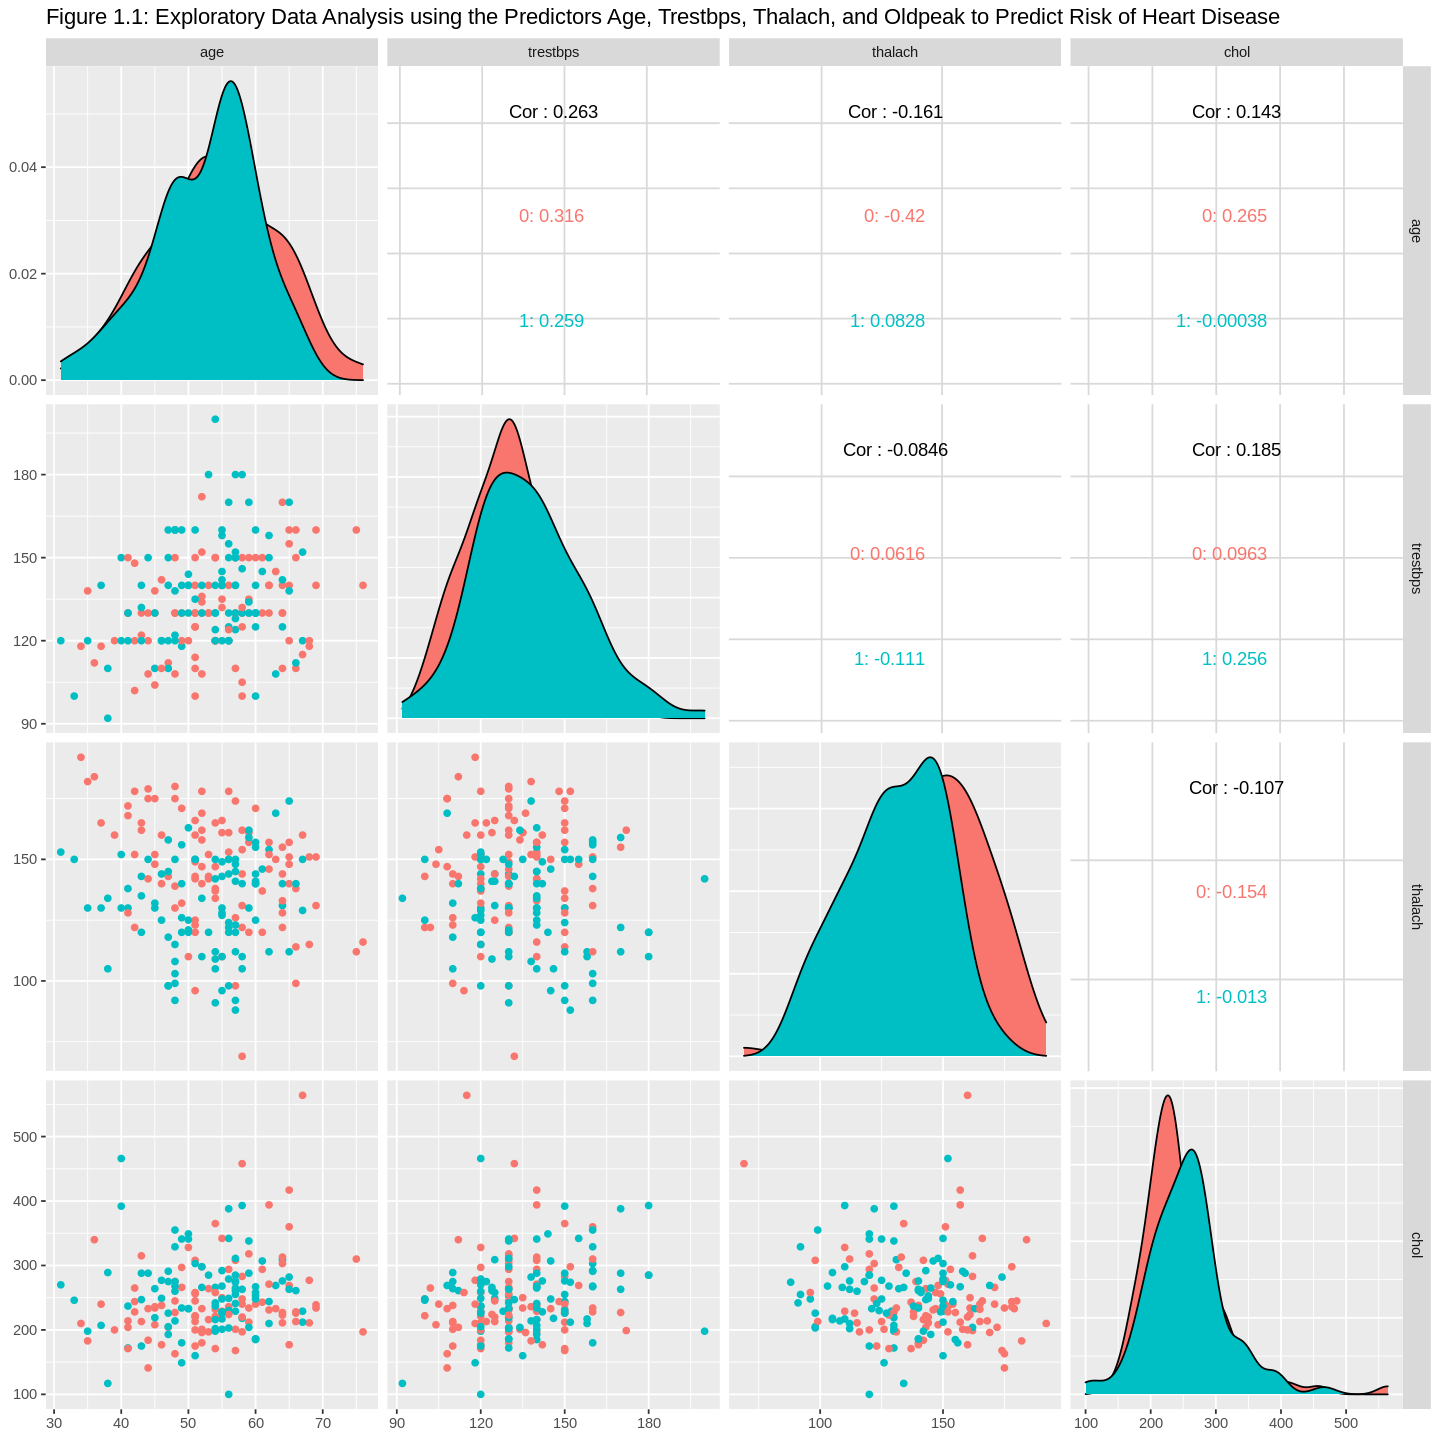

In [5]:
set.seed(1234)

options(repr.plot.width=12, repr.plot.height=12)

# heart_disease_scaled <- heart_disease_training %>%
#                         select(-ID, -num) %>%
#                         map_df(scale) %>%
#                         mutate(num = heart_disease_training$num)

heart_disease_graph <- ggpairs(heart_disease_training, columns = 1:4,
                        title="Figure 1.1: Exploratory Data Analysis using the Predictors Age, Trestbps, Thalach, and Oldpeak to Predict Risk of Heart Disease", 
                        ggplot2::aes(colour=num))

heart_disease_graph

#### Visualization for Showing Correlation Coefficient

The **correlation coefficient** is a measure that determines the degree to which the movement of two variables is associated. The strength of a linear relationship between two variables is measured using correlation coefficients. A **positive relationship** is indicated by a *correlation coefficient greater than zero*, while a **negative relationship** is indicated by a *value less than zero*. The possible range of values for the correlation coefficient is -1.0 to 1.0. 

Warning message in ggcorr(heart_disease_training, label = TRUE, label_size = 6, :
“data in column(s) 'num', 'ID' are not numeric and were ignored”


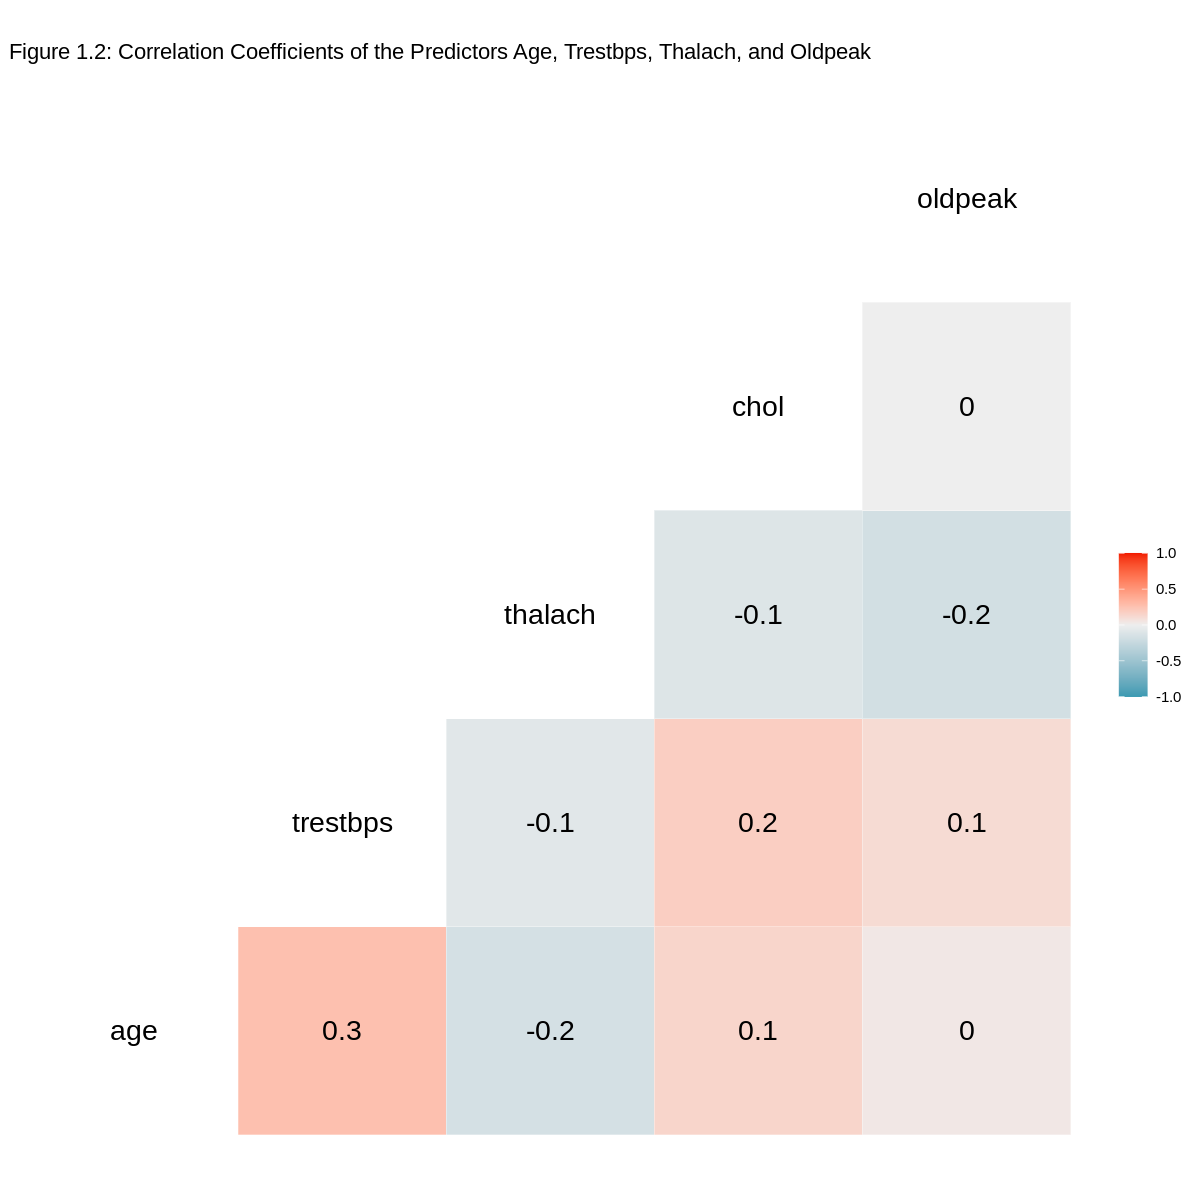

In [6]:
set.seed(1234)

options(repr.plot.width=10, repr.plot.height=10)

heart_disease_correlation <- ggcorr(heart_disease_training, 
                                    label = TRUE, label_size = 6, size=6) +
                                ggplot2::labs(title = "Figure 1.2: Correlation Coefficients of the Predictors Age, Trestbps, Thalach, and Oldpeak")

heart_disease_correlation

## Methods:

### Conduction of Data Analysis

Classification analysis will be used as the main method for the project. The five values to be used as predictors were selected from the 13 most relevant attributes, excluding the attribute “num” which is the factor to be predicted,  in the heart disease data set. These were specifically chosen as the other eight attributes were factor variables, which could not be effectively used in the classification.

Based on the correlation coefficients generated in Figure 1.2, all of the values have been observed to have a relationship, with age:trestbps, age:thalach, age:oldpeak, and thalach:oldpeak having the coefficients with the highest magnitude.


### Example of Result Visualization:

In [29]:
set.seed(1234)

heart_disease_vfold <- vfold_cv(heart_disease_training, v = 5, strata = num)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors=tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

heart_disease_recipe <- recipe(num ~ age + trestbps, data = heart_disease_training) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors()) %>%
  prep()

#the one below has age trestbps thalach chol
# heart_disease_recipe <- recipe(num ~ age + trestbps + thalach + chol, data = heart_disease_training) %>%
#   step_scale(all_predictors()) %>%
#   step_center(all_predictors()) %>%
#   prep()

knn_fit <- workflow() %>%
      add_recipe(heart_disease_recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = heart_disease_vfold, grid = 10) %>%
      collect_metrics()

accuracies_max <- knn_fit %>% 
      filter(.metric == "accuracy") %>%
      arrange(-mean)  %>% 
      slice(1)

accuracies_max

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,accuracy,binary,0.5863698,5,0.01742668,Model2


In [30]:
set.seed(1234)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors=3) %>%
  set_engine("kknn") %>%
  set_mode("classification")

knn_fit <- workflow() %>%
      add_recipe(heart_disease_recipe) %>%
      add_model(knn_spec) %>%
      fit(heart_disease_training)

age_grid <- seq(min(heart_disease_training$age), 
                max(heart_disease_training$age), 
                length.out = 100)

trestbps_grid <- seq(min(heart_disease_training$trestbps), 
                max(heart_disease_training$trestbps), 
                length.out = 100)

heart_disease_grid <- as_tibble(expand.grid(age = age_grid, 
                                trestbps = trestbps_grid))

knn_pred_grid <- predict(knn_fit, heart_disease_grid)

prediction_table <- bind_cols(knn_pred_grid, heart_disease_grid) %>%
  rename(num = .pred_class)

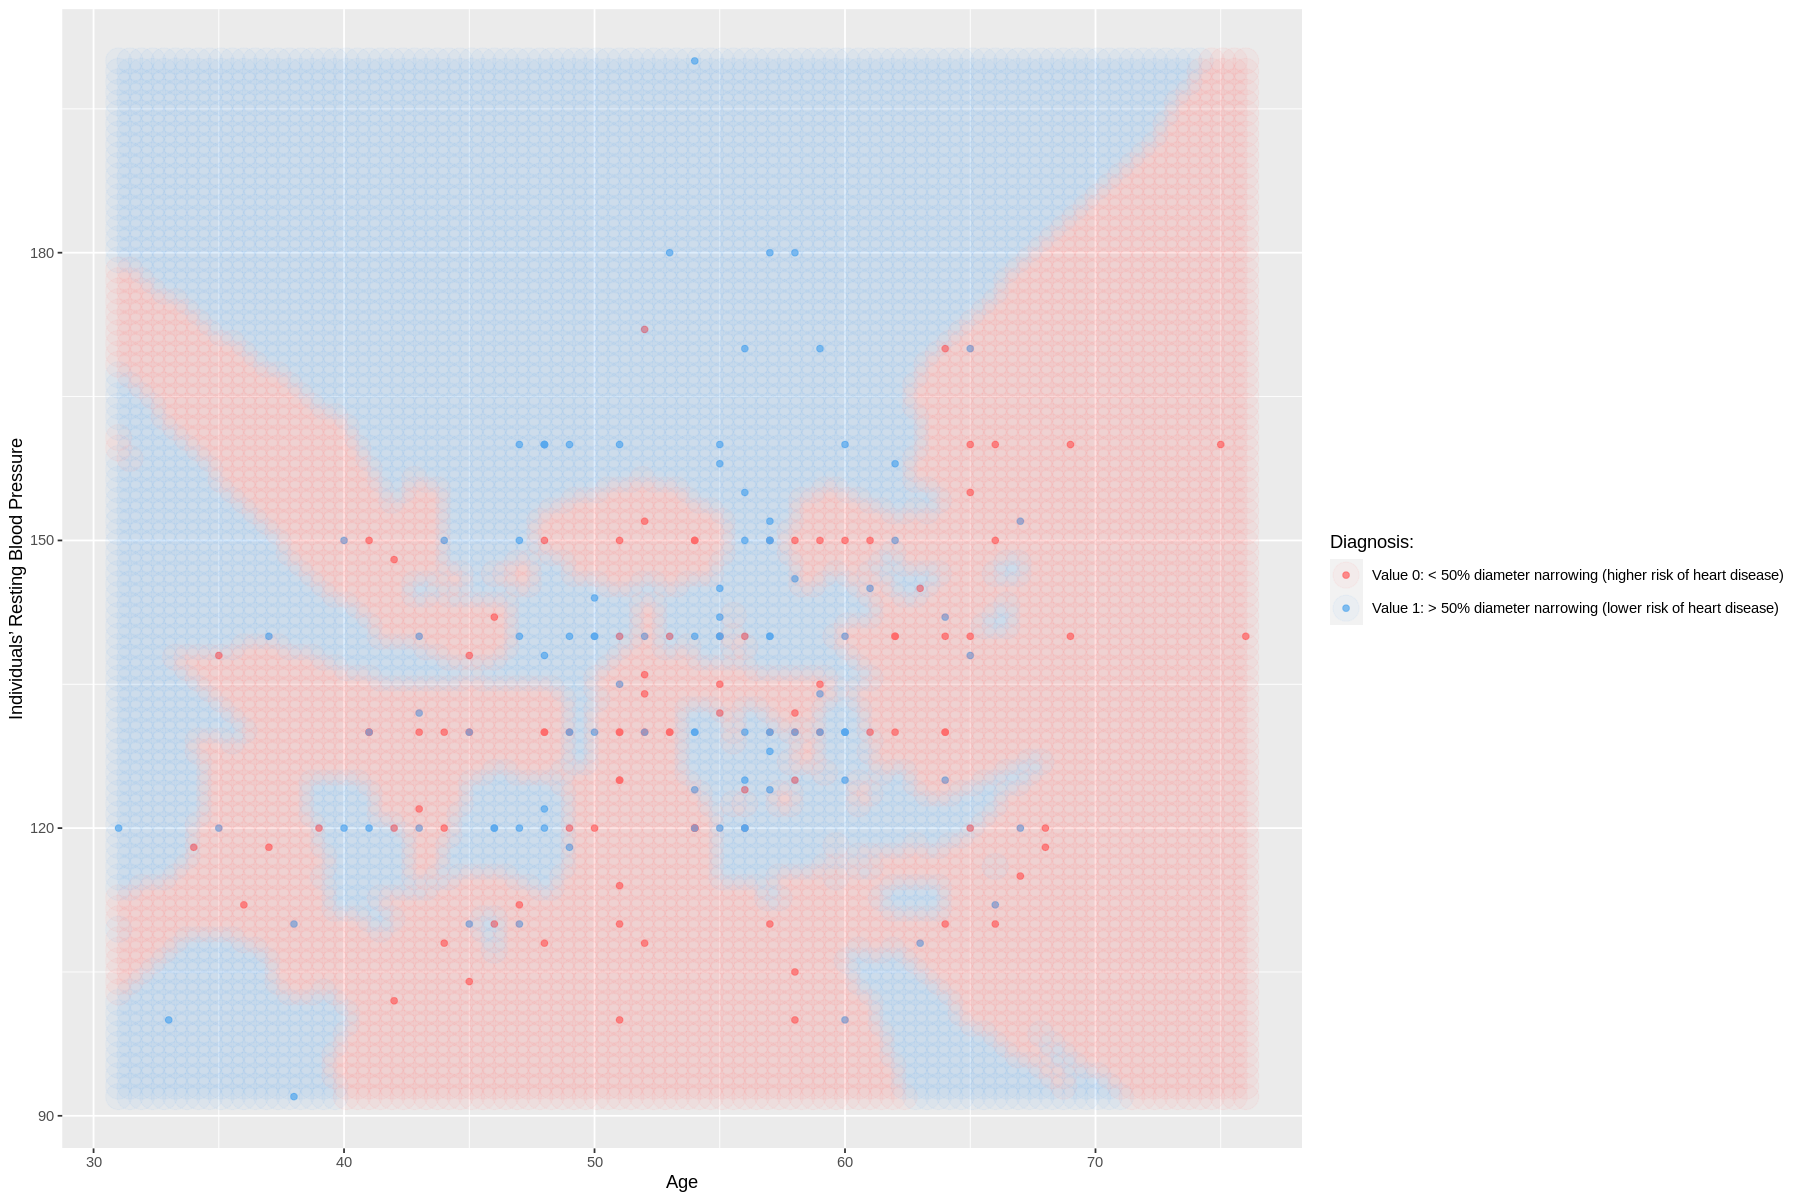

In [31]:
set.seed(1234)

options(repr.plot.width=15, repr.plot.height=10)

wkflw_plot <- ggplot() +
              geom_point(data = heart_disease_training, 
                         mapping = aes(x = age, 
                                       y = trestbps, 
                                       color = num), 
                         alpha = 0.75) +
              geom_point(data = prediction_table, 
                         mapping = aes(x = age, 
                                       y = trestbps, 
                                       color = num), 
                         alpha = 0.05, size = 7) +
              labs(color = "Diagnosis:", 
                   x = "Age", 
                   y = "Individuals’ Resting Blood Pressure"
#                    , title = "Figure 2.1: Visualization of Serum Cholesterol and Maximum Heart Rate Achieved to Predict Risk of Heart Disease"
                  ) +
              scale_color_manual(labels = c("Value 0: < 50% diameter narrowing (higher risk of heart disease)", "Value 1: > 50% diameter narrowing (lower risk of heart disease)"), 
                                 values = c("indianred1", "steelblue2"))

wkflw_plot

**chol (Serum Cholestoral (mg/dl)) and thalach (Maximum Heart Rate Achieved (beats per minute)):** 
These two predictors have a relatively moderate correlation as seen in the larger graph above. The correlation between them is non-linear, positive, and strong, as many points cluster together and some overlap. Patients with higher cholesterol are more likely to be diagnosed with heart disease, but once plotted with maximum heart rate (thalach) it is clear that thalach has a greater weight on contributing to each point’s ‘opinion’ on whether a patient has heart disease or not. (maximum heart rate tells us the capacity, or quantity of oxygen we are able to consume).  The graph suggests that as the cholesterol increases, the maximum heart rate increases as well, implying that the two predictors are positively correlated. This shows that they are well fitted as variables in determining the state of the target variable, the narrowing of blood vessels and therefore one’s risk of heart disease.



####  Other Predictors to be Used:

**Trestbps:** Based on the graph for the trestbps predictor we can see that having blood pressure levels on the higher side leads to patients with heart disease. We chose to include blood pressure as it plays a large role in determining the chances of having heart disease. High blood pressure can likely be a result of buildup of plaque as well as the narrowing of blood vessels. 

**Age:** The graph for the age predictor shows that older people are more prone to heart disease. Age is an incredibly important factor in this model as aging bodies lead to further complications that can occur due to deteriorating health. 

**Oldpeak:** The ST depression induced by exercise relative to rest. We chose to use this variable as this information can be used to determine obstructive coronary atherosclerosis (a form of heart disease likely covered in this dataset)

## Expected Outcomes and Significance:

### Expected findings: 
With the help of our model, we expect to be able to accurately predict whether an individual is more likely to have heart disease or not, if the resulting value is closer to 0 (higher risk of heart disease) or 1 (lower risk of heart disease)

### Impacts of findings: 
With deriving an accurate prediction model, it can aid the prediction of the presence or absence of heart disease, which is crucial to diagnose the disease at an early stage to prevent the development of severity that leads to life-threatening complications. Thus, providing medical professionals access to predicted knowledge which can highlight which patients are in dire need of medical attention versus those that are in need of less.

### Future questions:
+ How many attributes should be used to produce a model with better accuracy?
+ What other attributes from the data set can be used to improve the accuracy of the model? This is referring to the other 62 variables that were not used in previous experiments using the data set.



## References:

    American Heart Association. (2017, May 31). What is cardiovascular disease? www.heart.org. Retrieved November 7, 2021, from https://www.heart.org/en/health-topics/consumer-healthcare/what-is-cardiovascular-disease. 


    Chellammal, S., & Sharmila, R. (2019). Recommendation of attributes for heart disease prediction using Correlation Measure. International Journal of Recent Technology and Engineering, 8(2S3), 870–875. https://doi.org/10.35940/ijrte.b1163.0782s319 
    
    Harvard Health Publishing, (2021). Heart Health. Harvard Medical School. Retrieved November 9, 2021 from: https://www.health.harvard.edu/topics/heart-health.
    
     Centers for disease control and prevention, (2021, September 27). About Heart Disease. Heart Disease Home. Retrieved November 8, 2021, from: https://www.cdc.gov/heartdisease/about.htm 


In [26]:
#DONT RUN THIS 

set.seed(1234)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors=12) %>%
  set_engine("kknn") %>%
  set_mode("classification")

knn_fit <- workflow() %>%
      add_recipe(heart_disease_recipe) %>%
      add_model(knn_spec) %>%
      fit(heart_disease_training)

age_grid <- seq(min(heart_disease_training$age), 
                max(heart_disease_training$age), 
                length.out = 10)

trestbps_grid <- seq(min(heart_disease_training$trestbps), 
                max(heart_disease_training$trestbps), 
                length.out = 10)

thalach_grid <- seq(min(heart_disease_training$thalach), 
                max(heart_disease_training$thalach), 
                length.out = 10)

chol_grid <- seq(min(heart_disease_training$chol), 
                max(heart_disease_training$chol), 
                length.out = 10)

heart_disease_grid <- as_tibble(expand.grid(age = age_grid, 
                                trestbps = trestbps_grid, 
                                thalach = thalach_grid,
                                chol = chol_grid))

knn_pred_grid <- predict(knn_fit, heart_disease_grid)

prediction_table <- bind_cols(knn_pred_grid, heart_disease_grid) %>%
  rename(num = .pred_class)